#### Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

from sklearn.metrics import r2_score

## Linear Regression

In [2]:
def readFile(filename):
    trainFile = open(filename, 'r')
    Lines = trainFile.readlines()

    trainData = []

    for line in Lines:
        stringList = line.strip().split()
        trainData.append([float(i) for i in stringList])

    trainY = np.asarray(trainData)[:,-1:]
    trainX = np.asarray(trainData)[:,:-1]
    
    trainFile.close()
    
    return trainX, trainY
    
    
trainX, trainY = readFile('dataForTrainingLinear.txt')
print(trainX[:3], '\n', trainY[:3])

[[101.    1.7]
 [120.    2.3]
 [115.    4. ]] 
 [[641.48]
 [722.3 ]
 [569.43]]


In [3]:
trainX = np.concatenate((np.ones(shape=(len(trainX),1)),trainX), axis = 1)
trainX[:3]

array([[  1. , 101. ,   1.7],
       [  1. , 120. ,   2.3],
       [  1. , 115. ,   4. ]])

In [4]:
trainY = trainY.reshape(-1)
trainX.shape, trainY.shape

((50, 3), (50,))

In [5]:
np.random.normal(0,0.1,trainX.shape[1]).reshape((-1,1))

array([[ 0.12909188],
       [ 0.01531566],
       [-0.13248772]])

#### Functions

In [6]:
def predict(X, W):
    X = np.concatenate((np.ones(shape=(len(X),1)),X), axis = 1)
    Y_pred = np.dot(X,W)
    return Y_pred

In [7]:
def squared_loss(h_x, Y):
    J = np.mean((h_x - Y)**2)/2
    return J

In [8]:
# For Linear we are using weights with shape (3,) and for Logistic (3,1)
def gradientDescent(X, Y, alpha, n_epoch, mode = None):
    J = list()  

    W = np.random.normal(0,0.1,trainX.shape[1])
#     W = W.reshape((-1,1))
    if mode == 'BGD':
        for epoch in range(n_epoch):

            Y_hat = np.dot(X,W) # (50, 3) x (3,) 
            L = Y_hat - Y # (50,)
            W = W - ((alpha/float(len(X))) * np.dot(np.transpose(X),L))
            
            h_x = np.dot(X,W)
            J.append(squared_loss(h_x, Y))
            if(epoch%(n_epoch/10) == 0):
                print('Cost at {} epoch is: {}'.format(epoch, J[-1]))
    elif mode == 'SGD':
        for epoch in range(n_epoch):
            for row in range(len(X)):
                Y_hat = np.dot(X[row],W) # (1, 3) x (3, )
                L = Y_hat - Y[row] # (1,)
                
                transpose = np.transpose(X[row]) # (3,)
                W = W - ((alpha/float(len(X))) * np.dot(transpose,L))
                
            J.append(squared_loss(Y_hat, Y[row]))
            if(epoch%(n_epoch/10) == 0):
                print('Cost at {} epoch is: {}'.format(epoch, J[-1]))
            
    return W, J

### Batch Gradient Descent

In [9]:
n_epoch = 1500000
alpha = 0.00015

W, J = gradientDescent(trainX ,trainY, alpha, n_epoch, mode = "BGD")
print(J[-1])

Cost at 0 epoch is: 50416.151711451115
Cost at 150000 epoch is: 15.201200973111368
Cost at 300000 epoch is: 2.905472354986906
Cost at 450000 epoch is: 1.982627650511595
Cost at 600000 epoch is: 1.9133643823452773
Cost at 750000 epoch is: 1.9081658908831451
Cost at 900000 epoch is: 1.9077757228446321
Cost at 1050000 epoch is: 1.9077464391381176
Cost at 1200000 epoch is: 1.9077442412762153
Cost at 1350000 epoch is: 1.9077440763176787
1.907744063936917


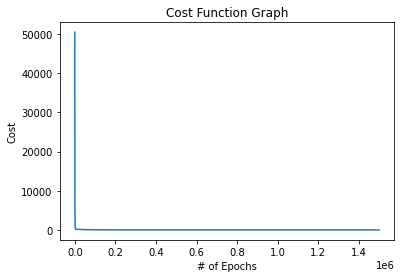

In [10]:
import matplotlib.pyplot as plt 
  
x = np.arange(1,n_epoch+1) 
y = J 
 
plt.plot(x, y) 

plt.xlabel('# of Epochs')  
plt.ylabel('Cost') 
  
plt.title('Cost Function Graph') 

plt.show()

#### Test Data

In [11]:
testX, testY = readFile('dataForTestingLinear.txt')
testY = testY.reshape(-1)
testX.shape, testY.shape

((10, 2), (10,))

In [12]:
Ypred = predict(testX, W)
Ypred

array([651.86700015, 506.2104531 , 514.21069376, 169.65694781,
       532.11419652, 550.68556579, 544.00188635, 476.55346302,
       354.99035081, 616.41953947])

In [13]:
squared_loss(Ypred, testY)

66.87310187783001

In [14]:
from sklearn.metrics import r2_score
r2_score(Ypred, testY)

0.9922423008017556

Cost at 0 test example is: 14.797000146696746
Cost at 1 test example is: 12.130453096119766
Cost at 2 test example is: 11.950693757262115
Cost at 3 test example is: 3.1969478134223834
Cost at 4 test example is: 11.064196520837527
Cost at 5 test example is: 11.51556578863108
Cost at 6 test example is: 13.52188634761751
Cost at 7 test example is: 11.343463023917934
Cost at 8 test example is: 7.69035081175565
Cost at 9 test example is: 13.87953946756636


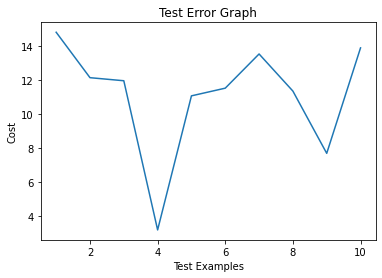

In [15]:
def plotTest(x, y):
    x = np.arange(1,len(x)+1)  
    
    plt.plot(x, y) 

    plt.xlabel('Test Examples')  
    plt.ylabel('Cost') 

    plt.title('Test Error Graph') 

    plt.show()

def testError(testX, testY, w):
    lossList = []
    y_hat = predict(testX, w)
    for i in range(len(testX)):
        L = y_hat[i] - testY[i]
        
        lossList.append(L)
        print('Cost at {} test example is: {}'.format(i, lossList[-1]))
    
    plotTest(testX, lossList)

testError(testX, testY, W)

### Stochastic Gradient Descent

In [16]:
n_epoch = 15000
alpha = 0.002

W, J = gradientDescent(trainX ,trainY, alpha, n_epoch, mode = "SGD")
print(J[-1])

Cost at 0 epoch is: 1600.883459159978
Cost at 1500 epoch is: 585.6551492619203
Cost at 3000 epoch is: 408.1779547561707
Cost at 4500 epoch is: 283.4583282831607
Cost at 6000 epoch is: 195.98332898394094
Cost at 7500 epoch is: 134.7787384027881
Cost at 9000 epoch is: 92.08125837806294
Cost at 10500 epoch is: 62.40255094067469
Cost at 12000 epoch is: 41.865554642729506
Cost at 13500 epoch is: 27.733956545379936
18.083950069030788


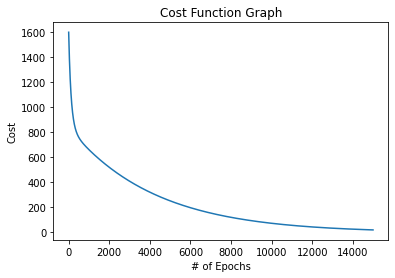

In [17]:
import matplotlib.pyplot as plt 
  
x = np.arange(1,n_epoch+1) 
y = J 
 
plt.plot(x, y) 

plt.xlabel('# of Epochs')  
plt.ylabel('Cost') 
  
plt.title('Cost Function Graph') 

plt.show()

#### Test Data

In [18]:
testX, testY = readFile('dataForTestingLinear.txt')
testY = testY.reshape(-1)
testX.shape, testY.shape

((10, 2), (10,))

In [19]:
Ypred = predict(testX, W)
Ypred

array([649.80904869, 504.1473014 , 512.75576632, 162.02021689,
       528.02276286, 546.63184786, 544.41209322, 474.55924093,
       349.2009779 , 614.39005611])

In [20]:
squared_loss(Ypred, testY)

46.16771866157327

In [21]:
from sklearn.metrics import r2_score
r2_score(Ypred, testY)

0.9947820450943942

Cost at 0 test example is: 12.739048689708284
Cost at 1 test example is: 10.067301397105552
Cost at 2 test example is: 10.495766322753752
Cost at 3 test example is: -4.439783110158402
Cost at 4 test example is: 6.972762864580659
Cost at 5 test example is: 7.46184786251672
Cost at 6 test example is: 13.932093216704743
Cost at 7 test example is: 9.349240929828
Cost at 8 test example is: 1.9009778988211679
Cost at 9 test example is: 11.85005610542396


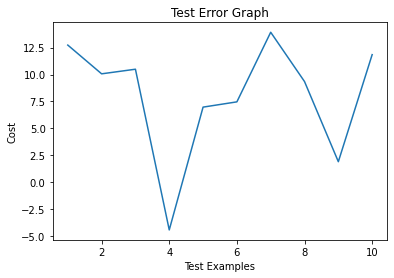

In [22]:
def plotTest(x, y):
    x = np.arange(1,len(x)+1)  
    
    plt.plot(x, y) 

    plt.xlabel('Test Examples')  
    plt.ylabel('Cost') 

    plt.title('Test Error Graph') 

    plt.show()

def testError(testX, testY, w):
    lossList = []
    y_hat = predict(testX, w)
    for i in range(len(testX)):
        L = y_hat[i] - testY[i]
        
        lossList.append(L)
        print('Cost at {} test example is: {}'.format(i, lossList[-1]))
    
    plotTest(testX, lossList)

testError(testX, testY, W)

## Logistic Regression

In [23]:
trainX, trainY = readFile('dataForTrainingLogistic.txt')
print(trainX[:3], '\n', trainY[:3])

[[0.4 0.8 0.4 0.9 0.1 0.6]
 [0.3 0.7 0.4 0.9 0.2 0. ]
 [0.4 0.6 0.2 1.  0.6 0.7]] 
 [[1.]
 [1.]
 [1.]]


In [24]:
trainX = np.concatenate((np.ones(shape=(len(trainX),1)),trainX), axis = 1)
trainX[:3]

array([[1. , 0.4, 0.8, 0.4, 0.9, 0.1, 0.6],
       [1. , 0.3, 0.7, 0.4, 0.9, 0.2, 0. ],
       [1. , 0.4, 0.6, 0.2, 1. , 0.6, 0.7]])

In [25]:
trainX.shape, trainY.shape

((400, 7), (400, 1))

In [43]:
testX, testY = readFile('dataForTestingLogistic.txt')
testX.shape, testY.shape

((100, 6), (100, 1))

In [27]:
def sigmoid(Z):
    return 1./(1. + np.exp(-Z))

def cross_entropy_loss(y_pred, y_true):
        return (-(y_true * np.log(y_pred))).sum()
    
#     return (-(y_true * np.log(y_pred))).sum()/float(len(y_true))
    
    
def predict(X, W, mode = None):
    X = np.concatenate((np.ones(shape=(len(X),1)),X), axis = 1)
    Y_pred = np.dot(X,W)
    Y_pred = sigmoid(Y_pred)
    if mode == "plot":
        return Y_pred
    Y_pred = np.where(Y_pred > 0.5, 1, 0)
    return Y_pred

In [61]:
def gradientDescent(X, Y, alpha, n_epoch, mode = None):
    J = list()  

    W = np.random.normal(0,0.1,X.shape[1])
    if mode == 'BGD':
        W = W.reshape((-1,1))
        for epoch in range(n_epoch):
            Z = np.dot(X,W) 
            Y_hat = sigmoid(Z)
            L = Y_hat - Y 
            W = W - ((alpha/float(len(X))) * np.dot(np.transpose(X),L))

            J.append(cross_entropy_loss(Y_hat, Y))
            if(epoch%(n_epoch/10) == 0):
                print('Cost at {} epoch is: {}'.format(epoch, J[-1]))
    elif mode == 'SGD':
        J = []
        for epoch in range(n_epoch):
            lossList = []
            for row in range(len(X)):
                X_i = X[row].reshape(1,-1)
                Z = np.dot(X_i,W) # (1,7) x (7,)
                Y_hat = sigmoid(Z) # (1,)
                L = Y_hat - Y[row] # (1,) - (1,)
                W = W - (alpha * (np.dot(np.transpose(X_i), L))) # (7,) - (7,) # transpose = (7,1) x (1,) 
                lossList.append(cross_entropy_loss(Y_hat, Y[row]))
            if(epoch%(n_epoch/10) == 0):
                print('Cost at {} epoch is: {}'.format(epoch, np.sum(lossList)))
            J.append(np.sum(lossList))
                
    return W, J


#### Batch Gradient Descent

In [31]:
n_epoch = 1500000
alpha = 0.00015

W, J = gradientDescent(trainX ,trainY, alpha, n_epoch, mode = "BGD")
print(J[-1])

Cost at 0 epoch is: 145.17429624919183
Cost at 150000 epoch is: 41.82213514533248
Cost at 300000 epoch is: 25.006761666979507
Cost at 450000 epoch is: 18.387440825615293
Cost at 600000 epoch is: 14.799175161405298
Cost at 750000 epoch is: 12.523743138474353
Cost at 900000 epoch is: 10.939808015303623
Cost at 1050000 epoch is: 9.766922056039514
Cost at 1200000 epoch is: 8.85937587341718
Cost at 1350000 epoch is: 8.13368310684781
7.538432093227147


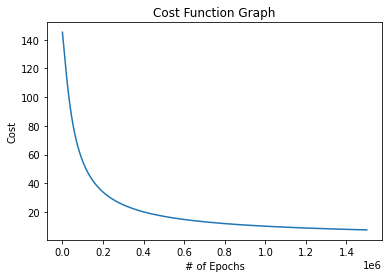

In [32]:
import matplotlib.pyplot as plt 
  
x = np.arange(1,n_epoch+1) 
y = J 
 
plt.plot(x, y) 

plt.xlabel('# of Epochs')  
plt.ylabel('Cost') 
  
plt.title('Cost Function Graph') 

plt.show()

In [36]:
Ypred = predict(testX, W)
Ypred[:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [45]:
# Alternate
# sum = 0
# for i in range(len(Ypred)):
#     if Ypred[i][0] == testY[i][0]:
#         sum += 1
# sum/len(Ypred)
correct = 0
def accuracy(Y_hat, Y):
    correct = np.where(Y_hat == Y, 1, 0)
    return np.sum(correct)

accuracy(Ypred, testY)

100

Cost at 0 test example is: [0.02470471]
Cost at 1 test example is: [0.00175435]
Cost at 2 test example is: [0.00536512]
Cost at 3 test example is: [-0.0019454]
Cost at 4 test example is: [0.06355726]
Cost at 5 test example is: [-0.00270907]
Cost at 6 test example is: [-0.00781583]
Cost at 7 test example is: [0.13154458]
Cost at 8 test example is: [-0.01174484]
Cost at 9 test example is: [0.00643423]
Cost at 10 test example is: [0.02609344]
Cost at 11 test example is: [-0.0080633]
Cost at 12 test example is: [0.00588335]
Cost at 13 test example is: [0.10614702]
Cost at 14 test example is: [-0.00944673]
Cost at 15 test example is: [0.00739736]
Cost at 16 test example is: [0.01430553]
Cost at 17 test example is: [-0.07788614]
Cost at 18 test example is: [0.03406296]
Cost at 19 test example is: [-0.05153333]
Cost at 20 test example is: [0.00484116]
Cost at 21 test example is: [0.06813309]
Cost at 22 test example is: [0.0184152]
Cost at 23 test example is: [-0.02843587]
Cost at 24 test exam

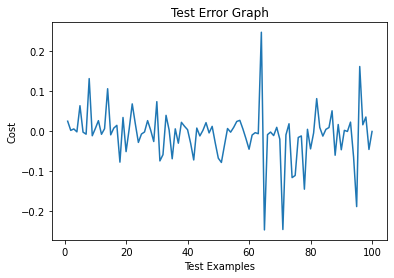

In [47]:
def plotTest(x, y):
    x = np.arange(1,len(x)+1)  
    
    plt.plot(x, y) 

    plt.xlabel('Test Examples')  
    plt.ylabel('Cost') 

    plt.title('Test Error Graph') 

    plt.show()

def testError(testX, testY, w):
    lossList = []
    y_hat = predict(testX, w, 'plot')
    for i in range(len(testX)):
        L = y_hat[i] - testY[i]
        
        lossList.append(L)
        print('Cost at {} test example is: {}'.format(i, lossList[-1]))
    
    plotTest(testX, lossList)

testError(testX, testY, W)

#### Stochastic Gradient Descent

In [62]:
n_epoch = 15000
alpha = 0.00015

W, J = gradientDescent(trainX ,trainY, alpha, n_epoch, mode = "SGD")
print(J[-1])

Cost at 0 epoch is: 104.9599807025021
Cost at 1500 epoch is: 14.704218788580963
Cost at 3000 epoch is: 8.831534931825242
Cost at 4500 epoch is: 6.601351881267819
Cost at 6000 epoch is: 5.388352785490925
Cost at 7500 epoch is: 4.6120899834090965
Cost at 9000 epoch is: 4.066447373979538
Cost at 10500 epoch is: 3.6586813445872703
Cost at 12000 epoch is: 3.340507031824404
Cost at 13500 epoch is: 3.0841461756651802
2.872537386465667


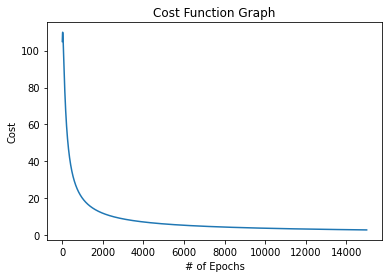

In [63]:
import matplotlib.pyplot as plt 
  
x = np.arange(1,n_epoch+1) 
y = J 
 
plt.plot(x, y) 

plt.xlabel('# of Epochs')  
plt.ylabel('Cost') 
  
plt.title('Cost Function Graph') 

plt.show()

In [67]:
Ypred = predict(testX, W)
Ypred = Ypred.reshape(-1,1)
Ypred[:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [68]:
correct = 0
def accuracy(Y_hat, Y):
    correct = np.where(Y_hat == Y, 1, 0)
    return np.sum(correct)

accuracy(Ypred, testY)

100

Cost at 0 test example is: [0.00527844]
Cost at 1 test example is: [0.00011032]
Cost at 2 test example is: [0.00058042]
Cost at 3 test example is: [-0.00010374]
Cost at 4 test example is: [0.02360233]
Cost at 5 test example is: [-0.00015331]
Cost at 6 test example is: [-0.00072679]
Cost at 7 test example is: [0.06437526]
Cost at 8 test example is: [-0.0013524]
Cost at 9 test example is: [0.00074689]
Cost at 10 test example is: [0.00571652]
Cost at 11 test example is: [-0.00082784]
Cost at 12 test example is: [0.00063428]
Cost at 13 test example is: [0.04539959]
Cost at 14 test example is: [-0.00097396]
Cost at 15 test example is: [0.00086841]
Cost at 16 test example is: [0.0023911]
Cost at 17 test example is: [-0.02314353]
Cost at 18 test example is: [0.00819965]
Cost at 19 test example is: [-0.01246045]
Cost at 20 test example is: [0.00050516]
Cost at 21 test example is: [0.02264076]
Cost at 22 test example is: [0.00324638]
Cost at 23 test example is: [-0.00574179]
Cost at 24 test exa

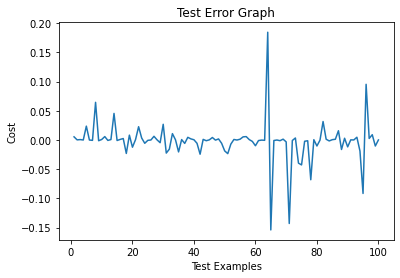

In [69]:
def plotTest(x, y):
    x = np.arange(1,len(x)+1)  
    
    plt.plot(x, y) 

    plt.xlabel('Test Examples')  
    plt.ylabel('Cost') 

    plt.title('Test Error Graph') 

    plt.show()

def testError(testX, testY, w):
    lossList = []
    y_hat = predict(testX, w, 'plot')
    for i in range(len(testX)):
        L = y_hat[i] - testY[i]
        
        lossList.append(L)
        print('Cost at {} test example is: {}'.format(i, lossList[-1]))
    
    plotTest(testX, lossList)

testError(testX, testY, W)

### K Splits

In [130]:
trainX, trainY = readFile('dataForTrainingLogistic.txt')
testX, testY = readFile('dataForTestingLogistic.txt')

In [131]:
def sigmoid(Z):
    return 1./(1. + np.exp(-Z))

def cross_entropy_loss(y_pred, y_true):
        return (-(y_true * np.log(y_pred))).sum()
#     return (-(y_true * np.log(y_pred))).sum()/float(len(y_true))

def accuracy(Y_hat, Y):
    correct = np.where(Y_hat == Y, 1, 0)
    return (np.sum(correct)/len(Y_hat))*100
    
def predict(X, W, mode = None):
    Y_pred = np.dot(X,W)
    Y_pred = sigmoid(Y_pred)
    if mode == "plot":
        return Y_pred
    Y_pred = np.where(Y_pred > 0.5, 1, 0)
    return Y_pred

In [132]:
def gradientDescent(X, Y, alpha, n_epoch, mode = None):
    J = list()  

    W = np.random.normal(0,0.1,X.shape[1])
    if mode == 'BGD':
        W = W.reshape((-1,1))
        for epoch in range(n_epoch):
            Z = np.dot(X,W) 
            Y_hat = sigmoid(Z)
            L = Y_hat - Y 
            W = W - ((alpha/float(len(X))) * np.dot(np.transpose(X),L))

            J.append(cross_entropy_loss(Y_hat, Y))
#             if(epoch%(n_epoch/10) == 0):
#                 print('Cost at {} epoch is: {}'.format(epoch, J[-1]))
    elif mode == 'SGD':
        J = []
        for epoch in range(n_epoch):
            lossList = []
            for row in range(len(X)):
                X_i = X[row].reshape(1,-1)
                Z = np.dot(X_i,W) # (1,7) x (7,)
                Y_hat = sigmoid(Z) # (1,)
                L = Y_hat - Y[row] # (1,) - (1,)
                W = W - (alpha * (np.dot(np.transpose(X_i), L))) # (7,) - (7,) # transpose = (7,1) x (1,) 
                lossList.append(cross_entropy_loss(Y_hat, Y[row]))
#             if(epoch%(n_epoch/10) == 0):
#                 print('Cost at {} epoch is: {}'.format(epoch, np.sum(lossList)))
            J.append(np.sum(lossList))
                
    return W, J

In [133]:
trainX = np.concatenate((np.ones(shape=(len(trainX),1)),trainX), axis = 1)
testX = np.concatenate((np.ones(shape=(len(testX),1)),testX), axis = 1)
trainX.shape, testX.shape

((400, 7), (100, 7))

In [134]:
trainY.shape, testY.shape

((400, 1), (100, 1))

In [135]:
combinedX = np.concatenate((trainX[:,:], testX[:,:]), axis = 0)
combinedY = np.concatenate((trainY[:,:], testY[:,:]), axis = 0)
combinedX.shape, combinedY.shape

((500, 7), (500, 1))

In [136]:
kSplits = [int((k/10)*len(trainX)) for k in range(1,11)]
kSplits

[40, 80, 120, 160, 200, 240, 280, 320, 360, 400]

In [139]:
n_epoch = 15000
alpha = 0.00015

kLoss = []
for k in kSplits:

    W, J = gradientDescent(trainX[:k] ,trainY[:k], alpha, n_epoch, mode = "BGD")
    kLoss.append(J[-1])
    
    
    Ypred = predict(combinedX, W)
    Ypred = Ypred.reshape(-1,1)
    
    acc = accuracy(Ypred, combinedY)
    print('Loss at k = {} is: {}'.format(k, kLoss[-1]))
    print('Accuracy at k = {} is: {}%'.format(k, acc))
    print('-'*20)

Loss at k = 40 is: 10.232265479460239
Accuracy at k = 40 is: 93.4%
--------------------
Loss at k = 80 is: 22.099429820220873
Accuracy at k = 80 is: 100.0%
--------------------
Loss at k = 120 is: 37.18319612405348
Accuracy at k = 120 is: 87.4%
--------------------
Loss at k = 160 is: 45.847321122643976
Accuracy at k = 160 is: 95.6%
--------------------
Loss at k = 200 is: 57.12958667578084
Accuracy at k = 200 is: 99.4%
--------------------
Loss at k = 240 is: 71.85951498085507
Accuracy at k = 240 is: 98.0%
--------------------
Loss at k = 280 is: 75.51352059660866
Accuracy at k = 280 is: 100.0%
--------------------
Loss at k = 320 is: 97.0002222828122
Accuracy at k = 320 is: 99.8%
--------------------
Loss at k = 360 is: 101.94265182147652
Accuracy at k = 360 is: 100.0%
--------------------
Loss at k = 400 is: 113.04853048935954
Accuracy at k = 400 is: 100.0%
--------------------


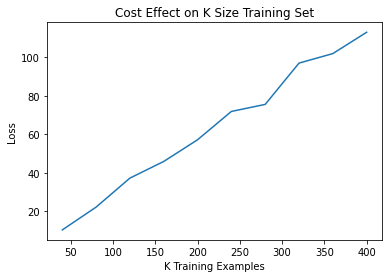

In [140]:
plt.plot(kSplits, kLoss) 

plt.xlabel('K Training Examples')  
plt.ylabel('Loss') 

plt.title('Cost Effect on K Size Training Set') 

plt.show()